# Analysing the stroop effect 

### What's the task ? 

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

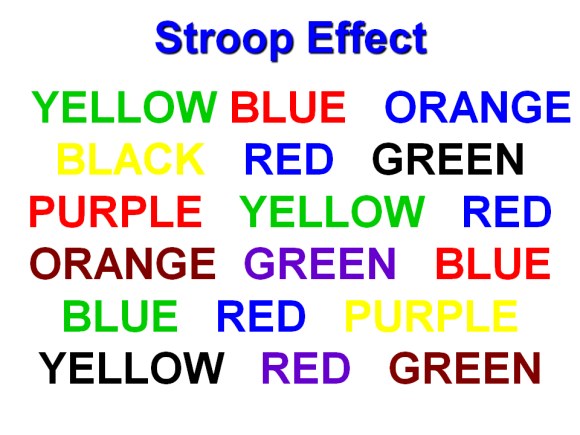 

**Our task is to perform analysis and answer some key questions's**


In [36]:
import numpy as np 
import pandas as pd
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### 1. What is the independent variable? What is the dependent variable? 

**Independent Variable** :- Congruent or Incongruent words , in basic terms whether the person has used correct ink for the word or not. 


**Dependent Variable** :- Reaction time to write the following word

####  2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices. 

There are few set of hypothesis which are heart and soul for any analysis. We need to check whether the particular variable show a particular difference or not. In our case the reaction time between the congruent and incongruent set. 

We first check for Null hypothesis , 


**Null Hypothsis** 

H0 - No change in time between two reading tasks (Congruent or Incongruent)

**Alternate Hypothesis**

H1 - incongruent task take more reaction time than the congruent task. 

1. H0: μi ≤ μc (μi - population mean of incongruent values, μc - population mean of congruent values)
2. H1: μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values) 


The statistical test that we are using are as follows , 

1. We compare the means of two dependent groups to find out the significant difference between two means.
2. We also assume that distributions are normal 
3. We do not know about the statistics of the data which means that we aren't aware of the standard deviation. 

**Which test and why ?** 

We use t-test since there is a particular observation of outliers and t-test is well known to work for outlier problems. We also want to find about the population and t-test fits the bill. 

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

Let's take a look at some basic descriptive statistics about the dataset that we are working on. 

In [3]:
data = pd.read_csv("stroopdata.csv")

In [7]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As we can see from the above table the mean displayed by **Congreuent is 14.0511 and Incongruent is 22.015**. We can also see that the standard deviation displayed by **Congruent and Incongruent are 3.5593 and 4.7970 respectively** 

We also observe the percentile and going by the interquartile formula of IQR = Q3-Q1 and range = (Q1 - IQR , Q3 + IQR) 

We derive the following ranges ,

**Congruent :- (7.58 , 20.51)** 

**Incongruent :- (13.382 , 29.385)**  

Hence we can assure that we have outlier and the use of t-test makes sense. 

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Let's take a look at the plots , 

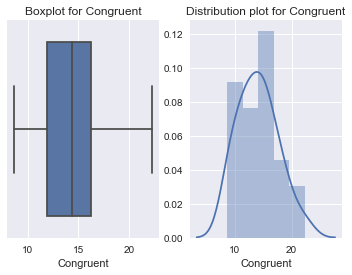

In [22]:
fig, axs = plt.subplots(1,2,)
g = sns.boxplot(data['Congruent'],ax=axs[0])
g.set_title("Boxplot for Congruent")
h = sns.distplot(data['Congruent'],ax = axs[1])
h.set_title("Distribution plot for Congruent")

Here we can see the distribution of points , Data seems to be normally distributed and the mid point of this distribution is somewhere around 14 and 15. 

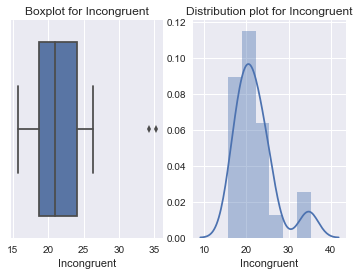

In [23]:
fig, axs = plt.subplots(1,2,)
g = sns.boxplot(data['Incongruent'],ax=axs[0])
g.set_title("Boxplot for Incongruent")
h = sns.distplot(data['Incongruent'],ax = axs[1])
h.set_title("Distribution plot for Incongruent")

Here we can see that there are outliers , the distribution seems to be skewed in the positive direction. We also see that there are outliers with the help of the boxplot.

### 5.Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations 

As we know from the table above , the count of the data we have is 24. Let's go indepth and find more about the dataset. 

In [40]:
critical_95 = scipy.stats.t.ppf(0.95 , data.shape[0])
print("Let's take the confidence level of 95% and degree of freedom of n-1 in this case which is 23 , We observe our critical value to be " , critical_95)

Let's take the confidence level of 95% and degree of freedom of n-1 in this case which is 23 , We observe our critical value to be  1.71088207991


In [42]:
critical_99 = scipy.stats.t.ppf(0.99 , data.shape[0])
print("Let's take the confidence level of 99% and degree of freedom of n-1 in this case which is 23 , We observe our critical value to be " , critical_99)

Let's take the confidence level of 99% and degree of freedom of n-1 in this case which is 23 , We observe our critical value to be  2.49215947316


Let's compute the mean difference , 

In [31]:
mean_dif = data['Incongruent'].mean() - data['Congruent'].mean()
mean_dif

7.964791666666665

From our calculation we see that the mean of the difference is 7.964 between Incongruent and Congruent set. We can also see some basic statistics :- 

In [45]:
data['dif'] = data['Incongruent'] - data['Congruent']
print(data['dif'].describe())
std_dif = data['dif'].describe()[2]

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: dif, dtype: float64


As we could see from the above table , **Our mean is around 7.964 with a standard deviation of 4.864** 

**Let's talk about the t-statistic** 

T-statistic is computed with the formula , 

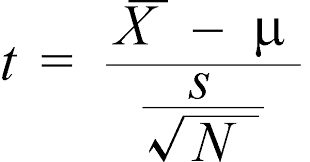

In [37]:
t_stat = mean_dif/(std_dif/math.sqrt(data.shape[0]))

In [38]:
t_stat

8.0207069441099552

**The computed t-value is 8.020** 

**Our critical value with 95% confidence level is 1.710** 

**We can see that the computed t value is greater than the critical value , Hence we can say that reaction time doing a congruent task is much lesser than that of incongruent task** 

In [43]:
t_stat > critical_95

True

### 6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions! 

There could be a good amount of change that the effect is observed due to the length of word , Like let's compare orange to red. The reaction time to write red would be much faster than Orange. Also , In case of congruent words we directly map the pattern and word but we don't do the same for Incongruent. We may also observe the same type of trend while comparing digits. 
